## Implementation 

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Training Data
train_X = np.asarray([[-0.4, 0.3], [-0.3, -0.1], [-0.2, 0.4], [-0.1, 0.1], [0.1, -0.5], [0.2, -0.9], [0.3, 0.2], [0.4, -0.6]])
train_Y = np.asarray([[1], [1], [1], [1], [0], [0], [0], [0]])
n_samples = train_X.shape[0]

In [3]:
# Parameters
learning_rate = 0.1
training_epochs = 25
display_step = 1

# tf Graph Input
x = tf.constant(train_X, dtype=tf.float32) # input data
y = tf.constant(train_Y, dtype=tf.float32) # lables

# Set model weights
W = tf.Variable(tf.zeros([2, 1]), name="W")
b = tf.Variable(tf.zeros([1]), name="b")

# Construct model
pred = lambda x: tf.sigmoid(tf.matmul(x, W) + b) # Sigmoid activation

# Minimize error using cross entropy
def cost(x, y):
  return lambda: -tf.reduce_sum(y*tf.math.log(pred(x)) + (1 - y)*tf.math.log(1 - pred(x)))

# Gradient Descent
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# Training cycle
for epoch in range(training_epochs):
  opt.minimize(cost(x, y), var_list=[W, b])

# Test model
correct_prediction = tf.equal(pred(x) > 0.5, y == 1)

# Calculate accuracy on training data
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print ("predictions:\n", pred(x).numpy())
print ("accuracy:", accuracy.numpy())

predictions:
 [[0.81206465]
 [0.63366175]
 [0.783129  ]
 [0.6345943 ]
 [0.2865792 ]
 [0.13852677]
 [0.5023741 ]
 [0.16245767]]
accuracy: 0.875


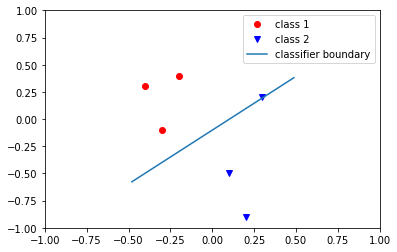

In [4]:
#Graphic display

plt.plot(train_X[0:3, 0], train_X[0:3, 1],  'ro', label='class 1')
plt.plot(train_X[4:7, 0], train_X[4:7, 1],  'bv', label='class 2')

# getting the co-ordinates for the decision boundary
plot_x = np.array([min(train_X[:,0]), max(train_X[:,0])])
plot_x[0] -= 0.1*(plot_x[1] - plot_x[0])
plot_x[1] += 0.1*(plot_x[1] - plot_x[0])
plot_y = (-1/W[1][0].numpy()) * (W[0][0].numpy() * plot_x + b[0].numpy())

plt.plot(plot_x, plot_y, label='classifier boundary');

plt.ylim(-1, 1)
plt.xlim(-1, 1)

plt.legend();